# Лабораторна робота 2.

## Створення штучно синтезованих наборів даних

**Лабораторна робота виконується індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

**Завдання 1: Синтезувати набір даних, який складається з двох лінійно роздільних множин, що можуть бути використані для навчання моделей класифікації.**


**Роз'яснення до завдання 1:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Обидва класи мають бути лінійно роздільні, тобто можна знайти таку пряму, яка розділяє дані двох класів без помилок.
   - Дані повинні бути рівномірно розподілені по всьому простору, але з певним відхиленням для забезпечення реалістичності.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів двох класів.
     - Додавання невеликого шуму до кожного класу для забезпечення варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Перевірка лінійної роздільності: Побудуйте графік з нанесеними точками і покажіть лінію, яка розділяє два класи.

5. **Додаткові умови:**
- Зробіть аналіз набору даних, побудувавши гістограми розподілу даних для кожного класу окремо.
- Опишіть підходи, які використовувалися для створення набору даних.

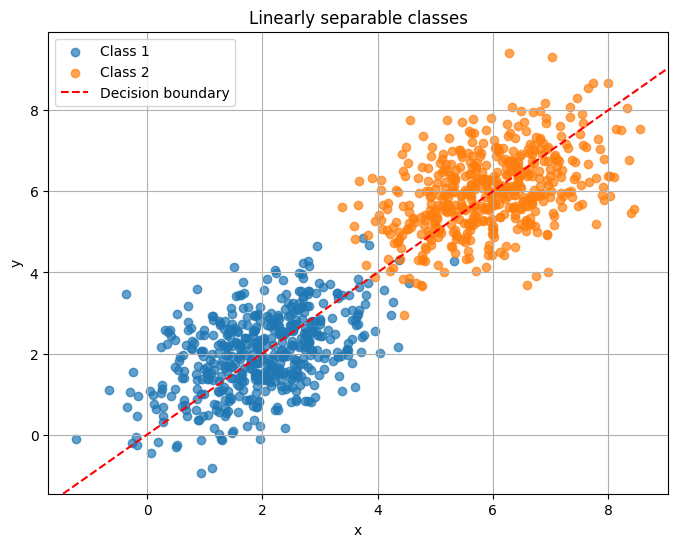

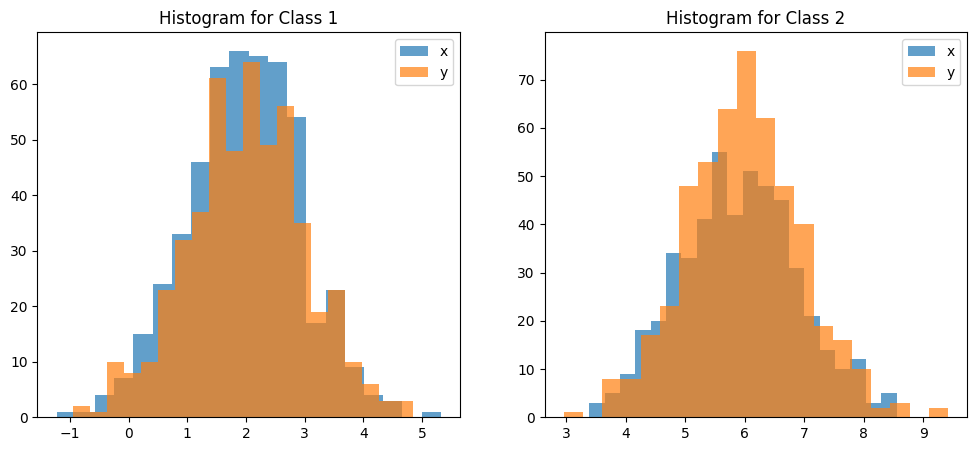

In [2]:
n_points_per_class = 500
np.random.seed(42)

mean_class1 = [2, 2]
mean_class2 = [6, 6]
covariance = [[1, 0.5], [0.5, 1]]

class1_points = np.random.multivariate_normal(mean_class1, covariance, n_points_per_class)
class2_points = np.random.multivariate_normal(mean_class2, covariance, n_points_per_class)

class1_labels = np.zeros(n_points_per_class, dtype=int)
class2_labels = np.ones(n_points_per_class, dtype=int)

x = np.vstack((class1_points, class2_points))
y = np.hstack((class1_labels, class2_labels))

data = pd.DataFrame(x, columns=['x', 'y'])
data['class'] = y

data.to_csv('dataset_1.csv', index=False)

plt.figure(figsize=(8, 6))
plt.scatter(class1_points[:, 0], class1_points[:, 1], label='Class 1', alpha=0.7)
plt.scatter(class2_points[:, 0], class2_points[:, 1], label='Class 2', alpha=0.7)
plt.axline(mean_class1, slope=1, color='red', linestyle='--', label='Decision boundary')
plt.title('Linearly separable classes')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(class1_points[:, 0], bins=20, alpha=0.7, label='x')
plt.hist(class1_points[:, 1], bins=20, alpha=0.7, label='y')
plt.title('Histogram for Class 1')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(class2_points[:, 0], bins=20, alpha=0.7, label='x')
plt.hist(class2_points[:, 1], bins=20, alpha=0.7, label='y')
plt.title('Histogram for Class 2')
plt.legend()

plt.show()


Для створення набору даних використовувався багатовимірний нормальний розподіл(np.random.multivariate_normal), де кожен клас мав свій центроїд і ковариаційну матрицю для визначення варіативності точок. Дані були створені з рівномірною кількістю точок для кожного класу (по 500) і додаванням невеликого шуму для забезпечення реалістичності. Центроїди обрано таким чином, щоб класи залишалися лінійно роздільними, а набір даних було збережено у форматі CSV для зручності використання. Аналіз включав графік із точками класів та гістограми розподілу для перевірки коректності генерації.

**Завдання 2: Синтезувати набір даних, який складається з трьох множин (класів), що мають часткове перекриття, для використання в задачах класифікації та аналізу даних.**

**Роз'яснення до завдання 2:**

1. **Опис набору даних:**
   - Набір даних повинен містити три класифікаційні мітки (клас 1, клас 2, клас 3).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані мають утворювати три множини, кожна з яких розподілена навколо свого центру, але з перекриттям з іншими множинами.
   - Кожен клас повинен мати певну ступінь перекриття з іншими класами, що призводить до часткової змішуваності точок з різними мітками.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів кожного класу.
     - Додавання більшого шуму або кореляції між точками для збільшення ступеня перекриття.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **300** для кожного класу (всього **900**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **900** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для всіх трьох класів, щоб візуалізувати перекриття множин.
   - Перевірте, чи дійсно дані утворюють перекриття між класами, показавши частку точок, які належать до зон перекриття.

5. **Додаткові умови:**
   - Побудуйте кореляційні графіки та гістограми розподілу для кожного класу.
   - Опишіть підходи, які використовувалися для створення набору даних, і обґрунтуйте вибір параметрів.

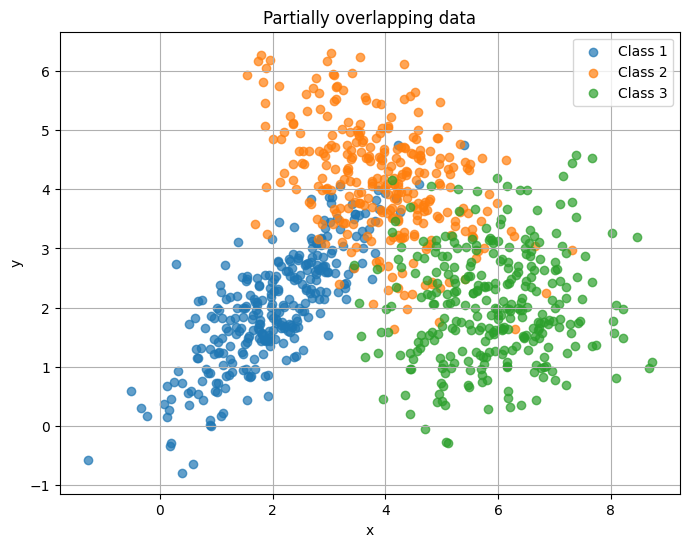

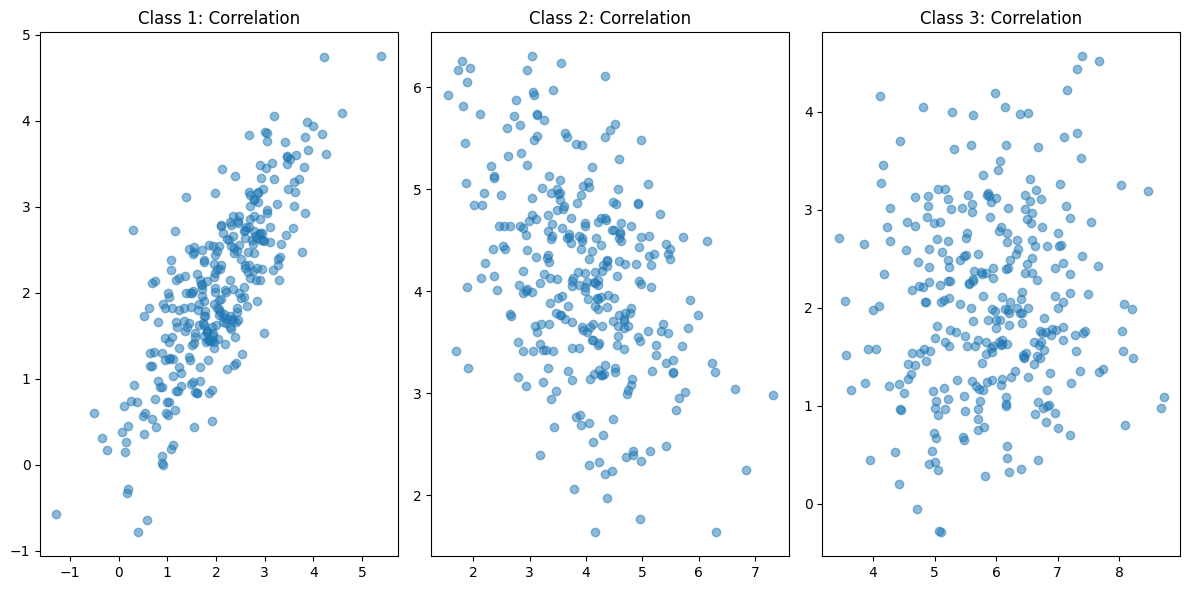

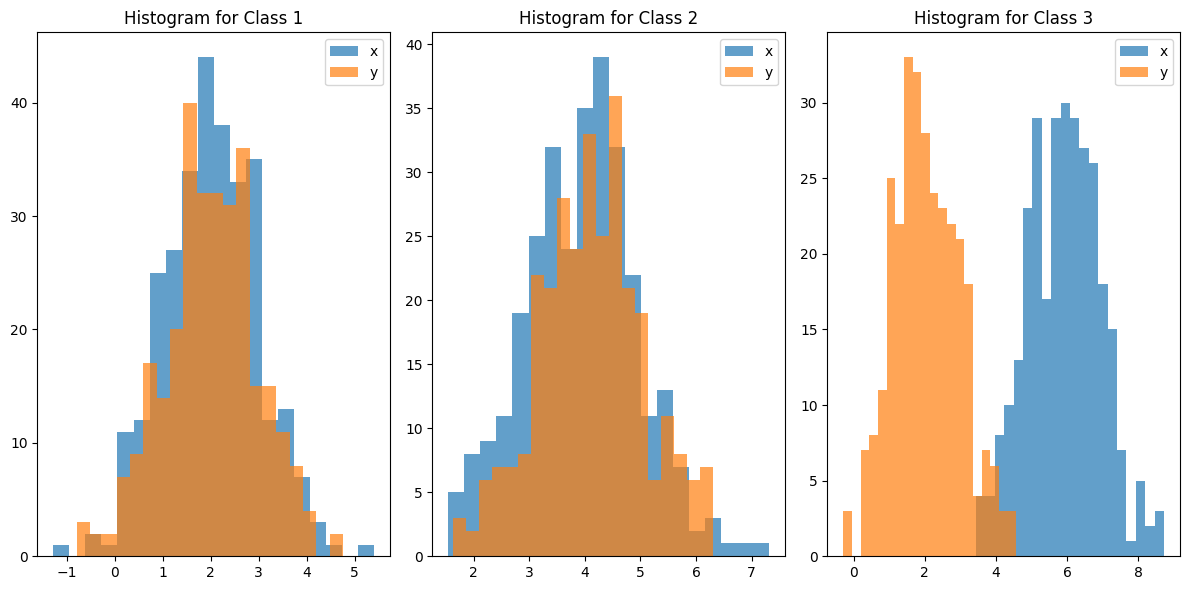

In [3]:
n_points_per_class = 300
np.random.seed(42)

mean_class1 = [2, 2]
mean_class2 = [4, 4]
mean_class3 = [6, 2]

covariance1 = [[1, 0.8], [0.8, 1]]
covariance2 = [[1, -0.5], [-0.5, 1]]
covariance3 = [[1, 0.2], [0.2, 1]]

class1_points = np.random.multivariate_normal(mean_class1, covariance1, n_points_per_class)
class2_points = np.random.multivariate_normal(mean_class2, covariance2, n_points_per_class)
class3_points = np.random.multivariate_normal(mean_class3, covariance3, n_points_per_class)

class1_labels = np.full(n_points_per_class, 1)
class2_labels = np.full(n_points_per_class, 2)
class3_labels = np.full(n_points_per_class, 3)

x = np.vstack((class1_points, class2_points, class3_points))
y = np.hstack((class1_labels, class2_labels, class3_labels))

data = pd.DataFrame(x, columns=['x', 'y'])
data['class'] = y

data.to_csv('dataset_2.csv', index=False)

plt.figure(figsize=(8, 6))
plt.scatter(class1_points[:, 0], class1_points[:, 1], label='Class 1', alpha=0.7)
plt.scatter(class2_points[:, 0], class2_points[:, 1], label='Class 2', alpha=0.7)
plt.scatter(class3_points[:, 0], class3_points[:, 1], label='Class 3', alpha=0.7)
plt.title('Partially overlapping data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.scatter(class1_points[:, 0], class1_points[:, 1], alpha=0.5)
plt.title('Class 1: Correlation')

plt.subplot(1, 3, 2)
plt.scatter(class2_points[:, 0], class2_points[:, 1], alpha=0.5)
plt.title('Class 2: Correlation')

plt.subplot(1, 3, 3)
plt.scatter(class3_points[:, 0], class3_points[:, 1], alpha=0.5)
plt.title('Class 3: Correlation')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(class1_points[:, 0], bins=20, alpha=0.7, label='x')
plt.hist(class1_points[:, 1], bins=20, alpha=0.7, label='y')
plt.title('Histogram for Class 1')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(class2_points[:, 0], bins=20, alpha=0.7, label='x')
plt.hist(class2_points[:, 1], bins=20, alpha=0.7, label='y')
plt.title('Histogram for Class 2')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(class3_points[:, 0], bins=20, alpha=0.7, label='x')
plt.hist(class3_points[:, 1], bins=20, alpha=0.7, label='y')
plt.title('Histogram for Class 3')
plt.legend()

plt.tight_layout()
plt.show()


Набір даних був створений за допомогою багатовимірного нормального розподілу для трьох класів з різними центрами та ковариаціями. Кожен клас має 300 точок, які розподіляються навколо певного середнього значення з урахуванням кореляцій між ознаками. Даний набір включає в себе часткове перекриття класів, що дозволяє тестувати алгоритми класифікації в умовах, коли класи не є чітко відокремленими. Для візуалізації результатів були побудовані точкові графіки, кореляційні діаграми та гістограми.

**Завдання 3: Синтезувати набір даних, який складається з двох множин у формі "тор в торі", де одна множина має форму внутрішнього тора, а інша — зовнішнього тора.**

**Роз'яснення до завдання 3:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві множини у формі тора: одна множина повинна бути розташована всередині іншої (тобто, "тор в торі").
   - Внутрішній тор (клас 1) повинен мати менший радіус і ширину, ніж зовнішній тор (клас 2).
   - Розподіл точок повинен бути рівномірним вздовж кожного тора з додаванням невеликого шуму для забезпечення варіативності.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y) $і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох класів, щоб візуалізувати форму "тор в торі".
   - Перевірте розподіл точок уздовж кожного тора, побудувавши радіальні гістограми для кожного класу.

5. **Додаткові умови:**
   - Побудуйте окремі графіки, які демонструють розподіл даних для кожного тора окремо.
   - Опишіть процес генерації даних та поясніть вибір параметрів для кожного тора.

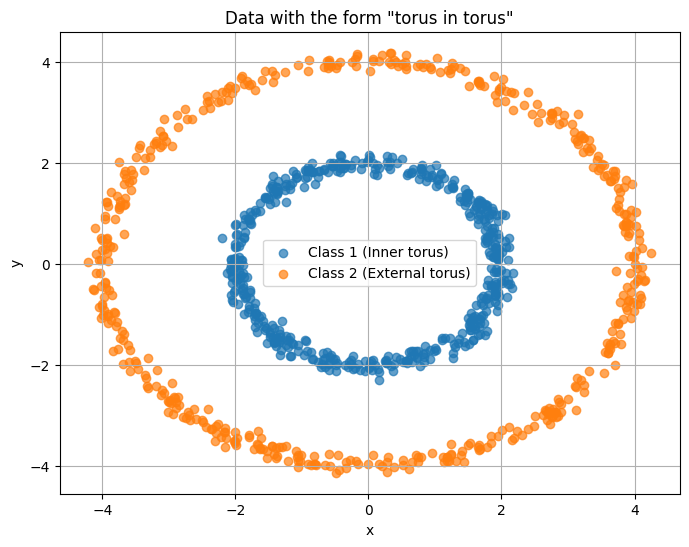

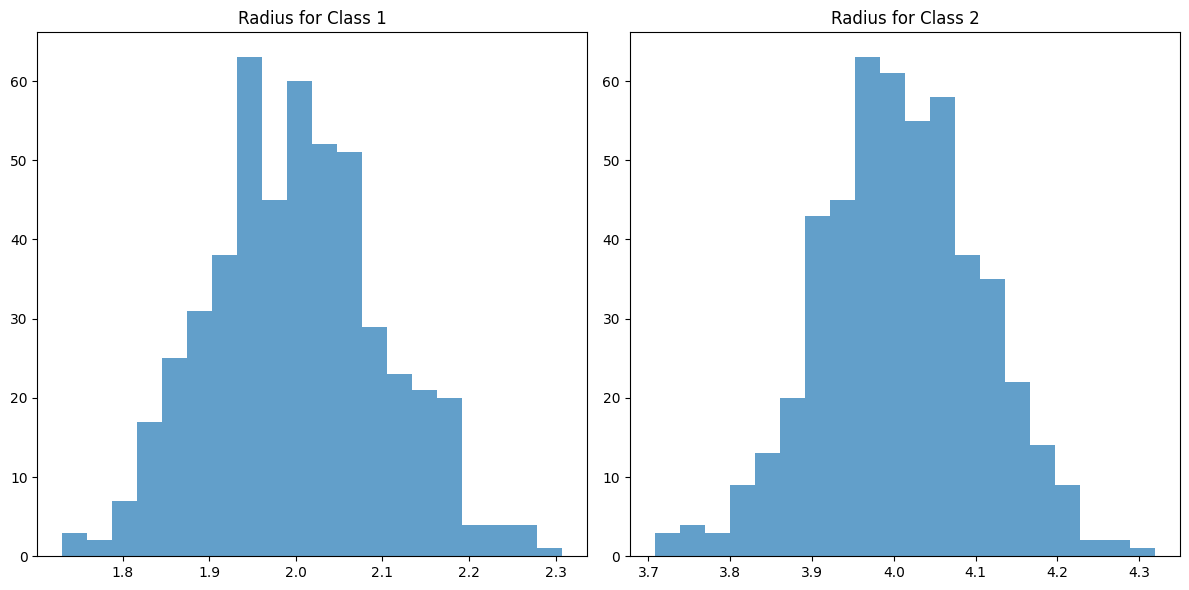

In [4]:
n_points_per_class = 500
np.random.seed(42)

radius_inner = 2
radius_outer = 4

theta_inner = np.random.uniform(0, 2 * np.pi, n_points_per_class)
r_inner = radius_inner + 0.1 * np.random.randn(n_points_per_class)
x_inner = r_inner * np.cos(theta_inner)
y_inner = r_inner * np.sin(theta_inner)

theta_outer = np.random.uniform(0, 2 * np.pi, n_points_per_class)
r_outer = radius_outer + 0.1 * np.random.randn(n_points_per_class)
x_outer = r_outer * np.cos(theta_outer)
y_outer = r_outer * np.sin(theta_outer)

x = np.concatenate((x_inner, x_outer))
y = np.concatenate((y_inner, y_outer))
labels = np.concatenate((np.full(n_points_per_class, 1), np.full(n_points_per_class, 2)))

data = pd.DataFrame({'x': x, 'y': y, 'class': labels})

data.to_csv('dataset_3.csv', index=False)

plt.figure(figsize=(8, 6))
plt.scatter(x_inner, y_inner, label='Class 1 (Inner torus)', alpha=0.7)
plt.scatter(x_outer, y_outer, label='Class 2 (External torus)', alpha=0.7)
plt.title('Data with the form "torus in torus"')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(np.sqrt(x_inner**2 + y_inner**2), bins=20, alpha=0.7)
plt.title('Radius for Сlass 1')

plt.subplot(1, 2, 2)
plt.hist(np.sqrt(x_outer**2 + y_outer**2), bins=20, alpha=0.7)
plt.title('Radius for Сlass 2')

plt.tight_layout()
plt.show()


Набір даних був створений за допомогою полярних координат, де кожен клас відповідає точкам, розташованим на двох тораних поверхнях з різними радіусами. Для внутрішнього тора (клас 1) точки мають менший радіус із додаванням незначного шуму для варіативності, тоді як для зовнішнього тора (клас 2) радіус більший, також з невеликим шумом. Точки для кожного класу рівномірно розподілені за кутами, що дозволяє сформувати правильну тороїдальну структуру. Додатково, дані були збережені у CSV-файлі для подальшого використання.

**Завдання 4: Синтезувати набір даних, який складається з двох множин, що утворюють подвійну спіраль, де одна спіраль огортає іншу.**

**Роз'яснення до завдання 4:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві спіралі, закручені одна в іншу, так щоб кожна спіраль відповідала одному з класів.
   - Спіралі повинні мати протилежні напрямки закручування (одна за годинниковою стрілкою, інша — проти).
   - Кожна спіраль повинна бути рівномірно заповнена точками з невеликим додаванням шуму для варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох спіралей, щоб візуалізувати структуру "спіраль у спіралі".
   - Проаналізуйте відмінності у розподілі точок для обох класів та оцініть складність їх розділення.

5. **Додаткові умови:**
   - Створіть окремі графіки, що показують як закручується кожна спіраль.
   - Опишіть процес генерації даних, включаючи параметри, що використовувалися для визначення форми спіралей.

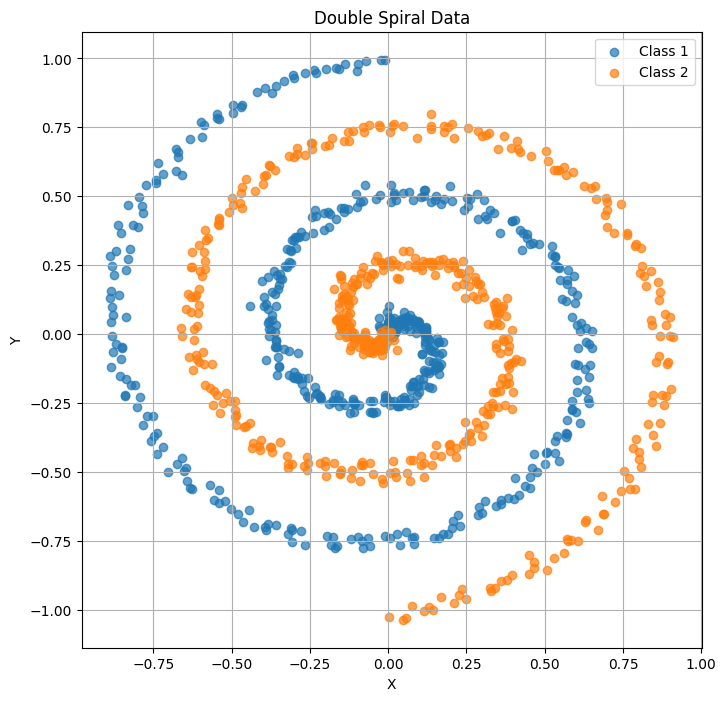

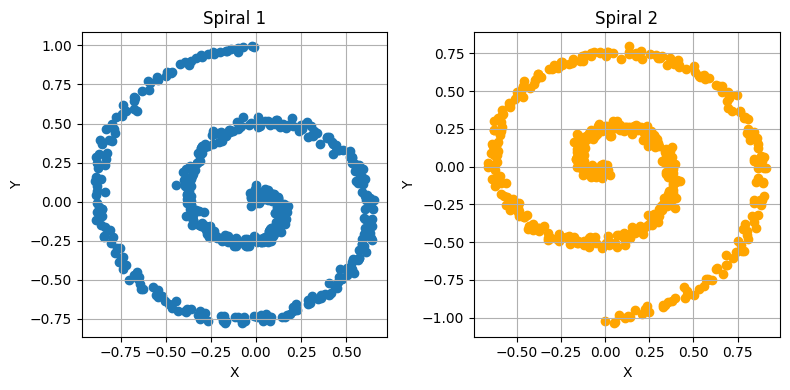

In [5]:
n_points = 500

theta1 = np.linspace(0, 4 * np.pi, n_points) 
theta2 = np.linspace(np.pi, 5 * np.pi, n_points) 

r1 = np.linspace(0, 1, n_points)
x1 = r1 * np.sin(theta1) + np.random.randn(n_points) * 0.02 
y1 = r1 * np.cos(theta1) + np.random.randn(n_points) * 0.02 

r2 = np.linspace(0, 1, n_points)
x2 = r2 * np.sin(theta2) + np.random.randn(n_points) * 0.02
y2 = r2 * np.cos(theta2) + np.random.randn(n_points) * 0.02 

data = {
    'x': np.concatenate([x1, x2]),
    'y': np.concatenate([y1, y2]),
    'class': np.concatenate([np.ones(n_points), np.ones(n_points) * 2])
}

df = pd.DataFrame(data)
df.to_csv('dataset_4.csv', index=False)

plt.figure(figsize=(8, 8))
plt.scatter(x1, y1, label='Class 1', alpha=0.7)
plt.scatter(x2, y2, label='Class 2', alpha=0.7)
plt.title('Double Spiral Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.scatter(x1, y1,)
plt.title('Spiral 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(x2, y2, color = 'orange')
plt.title('Spiral 2')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

plt.tight_layout()
plt.show()


Дані для подвійної спіралі генеруються за допомогою полярних координат, де кожна точка визначається кутом і радіусом. Кут для кожної спіралі рівномірно розподіляється від 0 до 4π (для першої спіралі) і від π до 5π (для другої спіралі). Радіус змінюється лінійно від 0 до 1 для кожної спіралі. Мінімальний шум додається до координат, щоб надати даним варіативність, але не вплинути на загальну форму спіралей.

**Завдання 5: Синтезувати кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами, дослідити вплив параметрів на динаміку системи та візуалізувати результати.**


### 5.1: Теоретичне підґрунтя

**Опис системи Лоренца:**
Система Лоренца — це набір трьох нелінійних диференціальних рівнянь, що описують динаміку тривимірної системи з хаотичною поведінкою. Вона визначається такими рівняннями:

$$
\frac{dx}{dt} = \sigma (y - x)
$$

$$
\frac{dy}{dt} = x (\rho - z) - y
$$

$$
\frac{dz}{dt} = xy - \beta z
$$

Де:
- $(x, y, z)$ — змінні стану системи.
- $\sigma$ — параметр, що відповідає за швидкість зміни (часто називають "параметр Прандтля").
- $\rho$ — параметр, що відповідає за різницю температур у системі (відповідає за інтенсивність конвекції).
- $\beta$  — параметр, що відповідає за співвідношення розмірів.

**Роз'яснення до завдання:**
- Згенерувати дані для системи Лоренца за допомогою різних значень параметрів $\sigma$, $\rho$ та $\beta$.
- Проаналізувати вплив зміни параметрів на траєкторії системи.
- Візуалізувати результати в тривимірному просторі для кожного набору даних.

### 5.2: Генерація та візуалізація набору даних

**Що треба зробити:**

1. **Генерація даних:**
   - Вибрати декілька різних комбінацій параметрів $\sigma$, $\rho$ та $\beta$.
   - Використовуючи числовий метод (наприклад, метод Рунге-Кутти 4-го порядку), згенерувати траєкторії системи Лоренца для кожного набору параметрів.

2. **Візуалізація:**
   - Для кожного набору параметрів побудувати тривимірні графіки траєкторій.
   - Відобразити траєкторії в просторі $(x, y, z)$.

3. **Аналіз:**
   - Порівняти результати для різних наборів параметрів.
   - Описати, як зміна кожного з параметрів впливає на поведінку системи (наприклад, перехід від стабільного до хаотичного режиму).

**Очікуваний результат:**
- Кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами (мінімум 3).
- Візуалізації цих траєкторій у тривимірному просторі.
- Аналіз і опис впливу параметрів на динаміку системи.

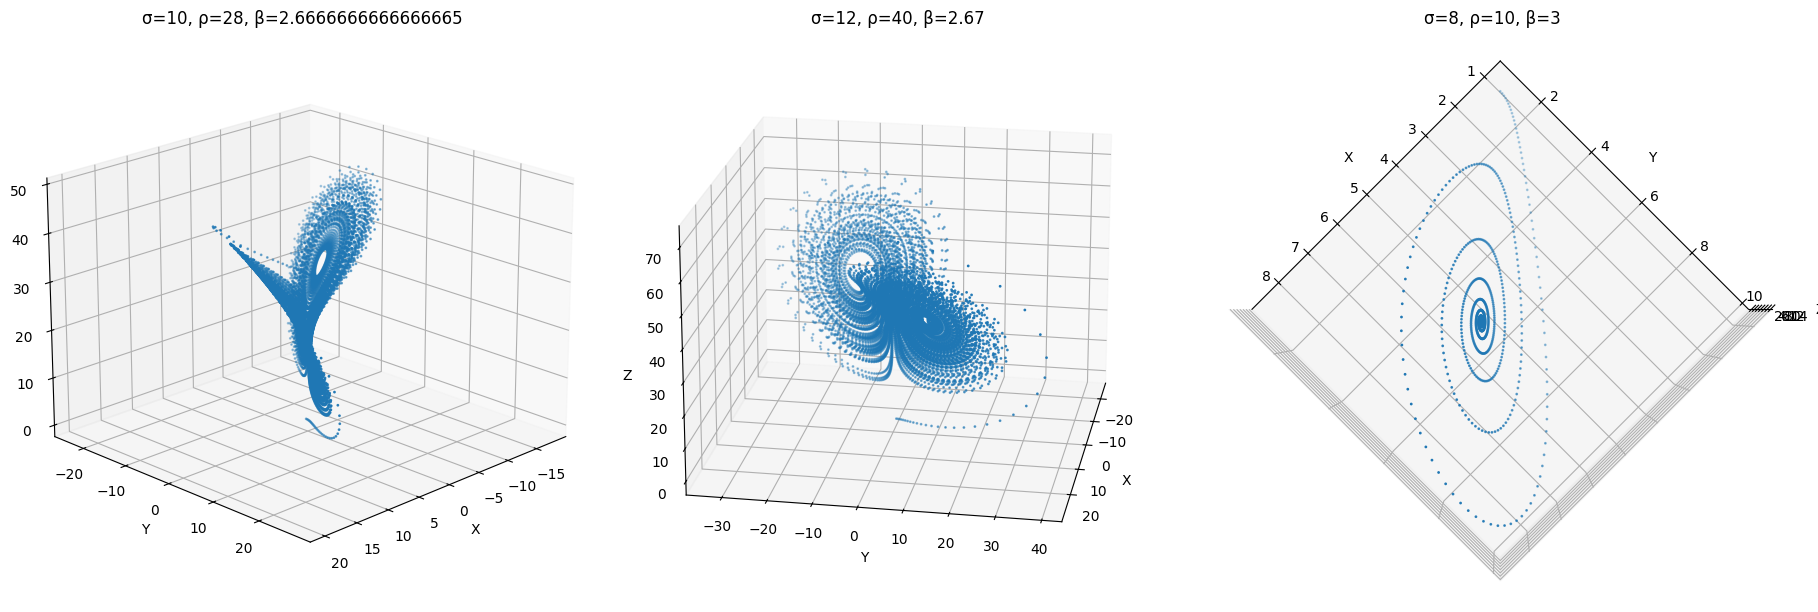

In [22]:
fig = plt.figure(figsize=(18, 6))

for i, params in enumerate(params_list):
    state = runge_kutta4(lorenz_system, state0, t, params)
    
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    ax.scatter(state[:, 0], state[:, 1], state[:, 2], s=1)
    ax.set_title(f"σ={params[0]}, ρ={params[1]}, β={params[2]}")
    
    if i == 0:
        ax.view_init(elev=20, azim=45)  
    elif i == 1:
        ax.view_init(elev=20, azim=10)  
    elif i == 2:
        ax.view_init(elev=90, azim=45)  
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

plt.tight_layout()
plt.show()


Зміна параметрів системи Лоренца має суттєвий вплив на її динаміку. Параметр "sigma" визначає швидкість зміни в системі, впливаючи на "швидкість" спіралі, де більші значення призводять до більш різких коливань. Параметр "rho" визначає інтенсивність конвекції, і збільшення його значення може спричинити перехід до хаотичного режиму, коли система втрачає свою стабільність. Параметр "beta" відповідає за співвідношення розмірів системи, і його збільшення зазвичай приводить до змін у розподілі точок в фазовому просторі, змінюючи форму траєкторії.